# K - Nearest Neighbor Algorithm

- K-NN algorithm can be used for Regression as well as for classification but mostly it is used for the classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm
- It works by looking at the nearest neighbors of the new data point which needs to be predicted and it checks K no. of nearest neighbors.

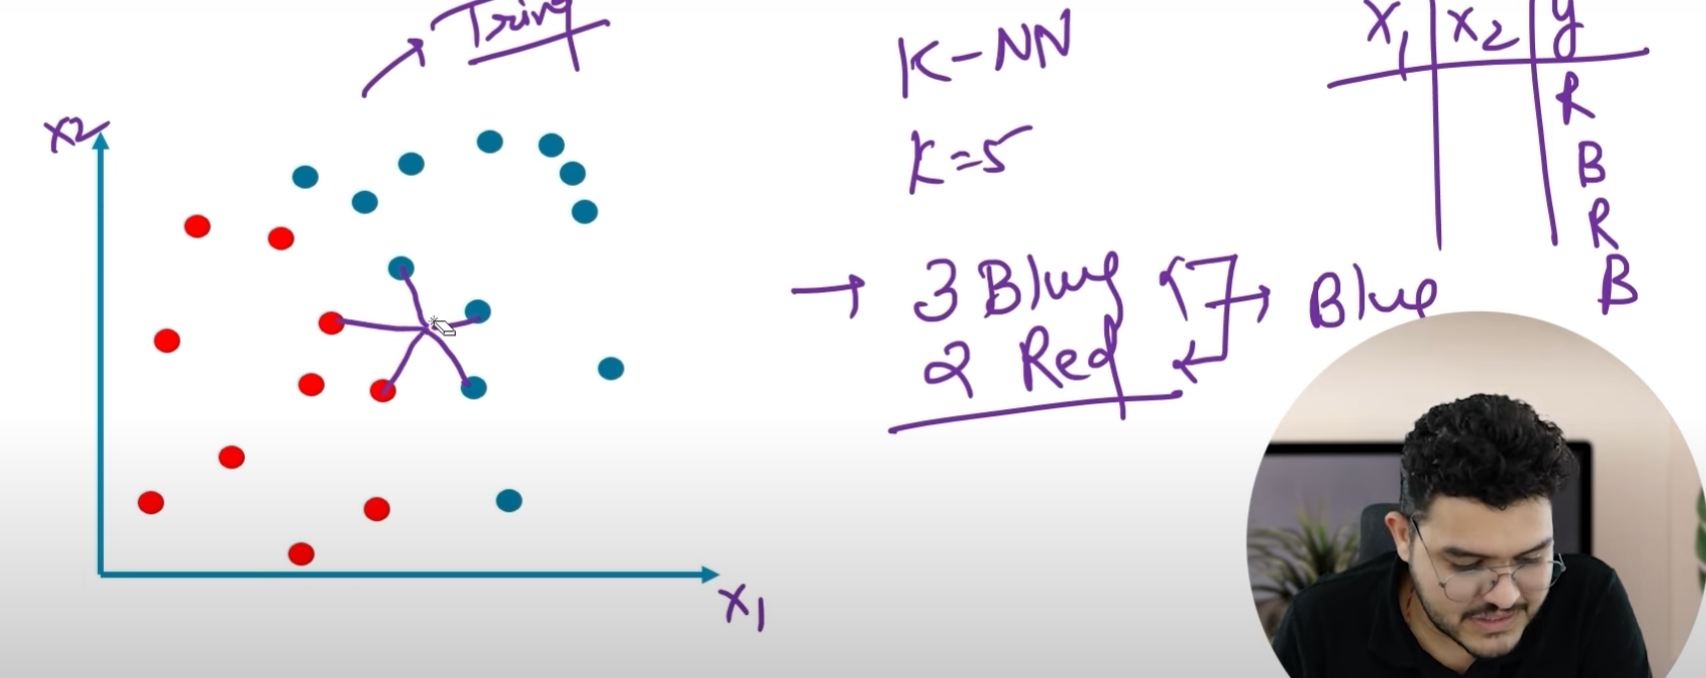

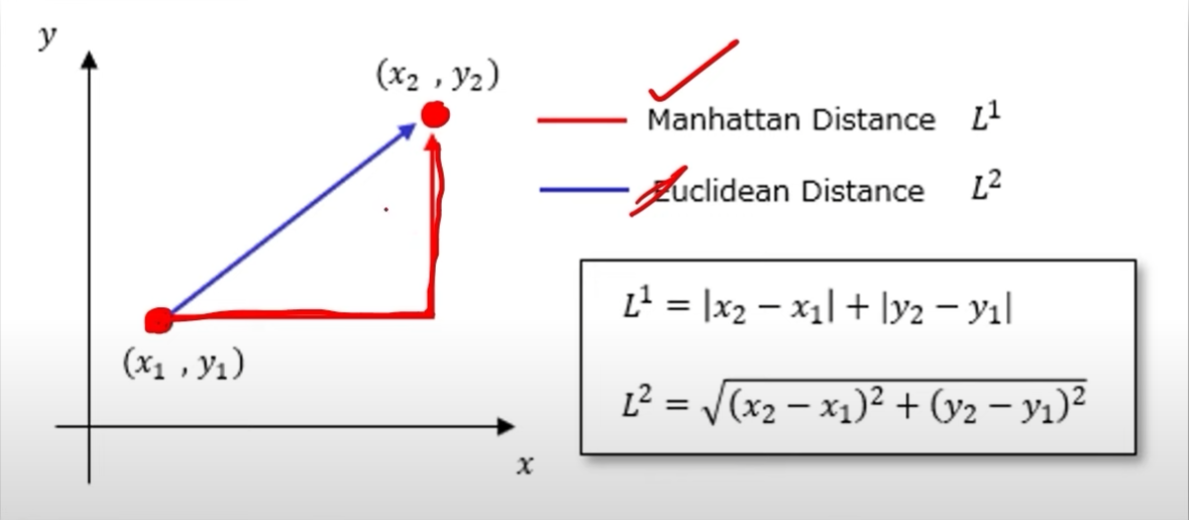

# K-Nearest Neighbors (K-NN) Classifier

### What is K-NN?
K-NN is a lazy, instance-based, supervised learning algorithm used for classification (or regression) by comparing the test point with its k closest training examples in the feature space.

### How It Works (Step-by-Step)

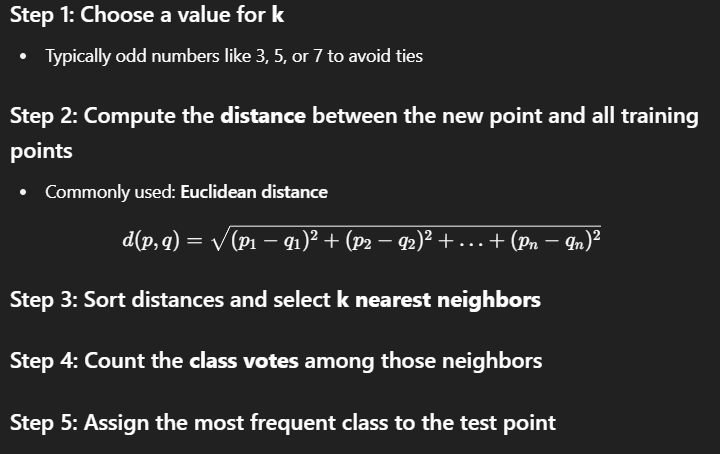

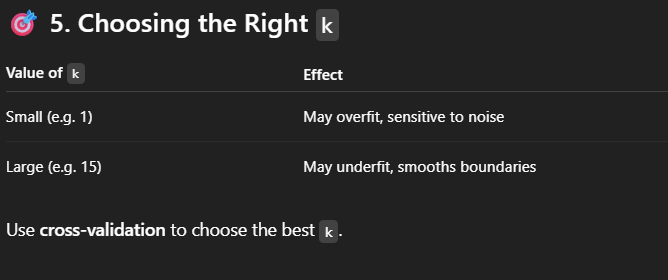

### Example in Python (2D Classification) From ChatGPT

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate synthetic 2D classification data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train K-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        34
           1       0.73      0.85      0.79        26

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



# Implementation From YouTube

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [94]:
ds = pd.read_csv("Social_Network_Ads.csv")
ds.drop(columns=['User ID', 'Gender'], inplace=True)
ds.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [95]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

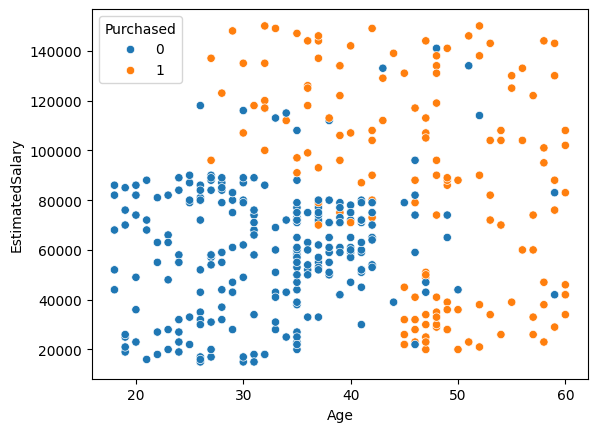

In [96]:
sns.scatterplot(x= 'Age', y= 'EstimatedSalary', data= ds, hue= 'Purchased')
plt.show()

In [97]:
x = ds.drop(columns=['Purchased'])
y = ds['Purchased']

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.3, random_state=42)

In [104]:
model = KNeighborsClassifier(n_neighbors=9)  # Default distance is Euclidean but if i use p=1 then it will use Manhattan distance
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [105]:
model.score(X_test, y_test)*100

95.0

In [106]:
model.score(X_test, y_test)*100

95.0

In [107]:
for i in range(1, 30):
    model1 = KNeighborsClassifier(n_neighbors=i)
    model1.fit(X_train, y_train)
    print(i , model1.score(X_test, y_test)*100, model1.score(X_test, y_test)*100)

1 88.33333333333333 88.33333333333333
2 85.83333333333333 85.83333333333333
3 92.5 92.5
4 91.66666666666666 91.66666666666666
5 93.33333333333333 93.33333333333333
6 93.33333333333333 93.33333333333333
7 94.16666666666667 94.16666666666667
8 94.16666666666667 94.16666666666667
9 95.0 95.0
10 93.33333333333333 93.33333333333333
11 94.16666666666667 94.16666666666667
12 93.33333333333333 93.33333333333333
13 93.33333333333333 93.33333333333333
14 93.33333333333333 93.33333333333333
15 94.16666666666667 94.16666666666667
16 93.33333333333333 93.33333333333333
17 93.33333333333333 93.33333333333333
18 93.33333333333333 93.33333333333333
19 93.33333333333333 93.33333333333333
20 92.5 92.5
21 92.5 92.5
22 92.5 92.5
23 92.5 92.5
24 92.5 92.5
25 92.5 92.5
26 92.5 92.5
27 92.5 92.5
28 92.5 92.5
29 92.5 92.5


C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


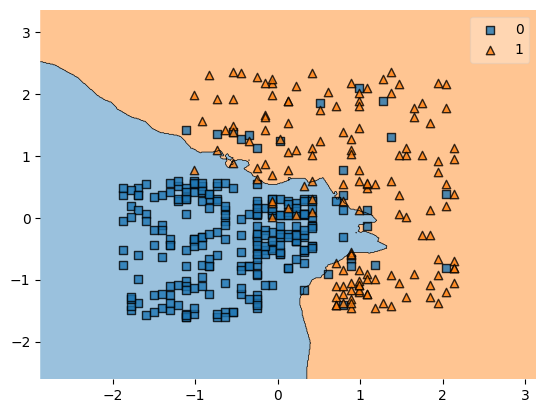

In [109]:
plot_decision_regions(X_train_scaled.to_numpy(), y.to_numpy(), clf=model) # it made an place proprely.
plt.show()